In [1]:
#importing required packages

import uproot
import matplotlib.pyplot as plt
import pandas as pd
# import numpy as np
import sys
from multiprocessing import Process
from skhep.math.vectors import LorentzVector, Vector3D

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import FormatStrFormatter

from IPython.display import display, Latex

# the package of my own defined functions
# with importing you gotta import every module that you used in your function in your functions file like numpy
# from functions import *

%matplotlib inline

In [2]:
# Note that when the format is ipynb then importing doesn't work, I don't know why. So this is the alternative way

# execfile('file.py') in Python 2
exec(open('functions.py').read()) #in Python 3

b


## Cuts

In [3]:
AND=" and ";   OR=" or ";   NOT=" not ";   cand0=" (__candidate__==0) ";   mycand=" (__candidate__==myBest) "
BpBmcut="( decayModeID==3005530 )";        B0B0cut="( decayModeID>=3005531 and decayModeID<=3005534 )"
roecuts="( nROE_Ch==0 and Eextra_ROE<1 )"
y4scuts="( cosBY0<1.1 and cosBY0>-1.9 and cosBY1<1.1 and cosBY1>-1.9 and (B0_decayModeID<500 or B1_decayModeID<500) )"
y4scuts_new = "( cosBY0<1.3 and cosBY0>-3.2 and cosBY1<1.1 and cosBY1>-1.9 )"
pipcut0="( (abs(pi4_B0_InvM-0.1395)<0.001 and pi4_1_B0_PDG!=22)"
pipcut1="( (abs(pi4_B1_InvM-0.1395)<0.001 and pi4_1_B1_PDG!=22)"
pipcut = '('+pipcut0 +OR+ pipcut1+')'
piptrue= '(('+pipcut0+AND+'(pi4_B0_isSignal==1))' +OR+ '('+pipcut1+AND+'(pi4_B1_isSignal==1))'+')'
pi0cut0="(abs(pi4_B0_InvM-0.135)<0.025 and pi4_0_B0_PDG==22 and pi4_1_B0_PDG==22)"
pi0cut1="(abs(pi4_B1_InvM-0.135)<0.025 and pi4_0_B1_PDG==22 and pi4_1_B1_PDG==22)"
pi0cut = '('+pi0cut0 +OR+ pi0cut1+')'
pi0wide0="(abs(pi4_B0_InvM-0.135)<0.050 and pi4_0_B0_PDG==22 and pi4_1_B0_PDG==22)"
pi0wide1="(abs(pi4_B1_InvM-0.135)<0.050 and pi4_0_B1_PDG==22 and pi4_1_B1_PDG==22)"
pi0wide = '('+pi0wide0 +OR+ pi0wide1+')'
pi0true0= '('+pi0wide0 +AND+ '(pi4_B0_isSignal==1)'+')'
pi0true1= '('+pi0wide1 +AND+ '(pi4_B1_isSignal==1)'+')'
pi0true = '('+pi0true0 +OR+ pi0true1+')'
pi0cutE0= '('+pi0cut0 +AND+ '(pi4_B0_ECM>0.35)'+')'
pi0cutE1= '('+pi0cut1 +AND+ '(pi4_B1_ECM>0.35)'+')'
pi0cutE = '('+pi0cutE0 +OR+ pi0cutE1+')'
pi0wideE0= '('+pi0wide0 +AND+ '(pi4_B0_ECM>0.35)'+')'
pi0wideE1= '('+pi0wide1 +AND+ '(pi4_B1_ECM>0.35)'+')'
pi0wideE = '('+pi0wideE0 +OR+ pi0wideE1+')'
pi0trueE0= '('+pi0true0 +AND+ '(pi4_B0_ECM>0.35)'+')'
pi0trueE1= '('+pi0true1 +AND+ '(pi4_B1_ECM>0.35)'+')'
pi0trueE = '('+pi0trueE0 +OR+ pi0trueE1+')'
etacut0 ="(abs(pi4_B0_InvM-0.547)<0.055 and pi4_0_B0_PDG==22 and pi4_1_B0_PDG==22)"
etacut1 ="(abs(pi4_B1_InvM-0.547)<0.055 and pi4_0_B1_PDG==22 and pi4_1_B1_PDG==22)"
etacut  = '('+etacut0 +OR+ etacut1+')'
etawide0="(abs(pi4_B0_InvM-0.547)<0.120 and pi4_0_B0_PDG==22 and pi4_1_B0_PDG==22)"
etawide1="(abs(pi4_B1_InvM-0.547)<0.120 and pi4_0_B1_PDG==22 and pi4_1_B1_PDG==22)"
etawide = '('+etawide0 +OR+ etawide1+')'
etatrue0= '('+etawide0 +AND+ '(pi4_B0_isSignal==1)'+')'
etatrue1= '('+etawide1 +AND+ '(pi4_B1_isSignal==1)'+')'
etatrue = '('+etatrue0 +OR+ etatrue1+')'

Bprec_eta = "((abs(B0_decayModeID-250)<160 and abs(B1_decayModeID-1650)<60) or (abs(B1_decayModeID-250)<160 and abs(B0_decayModeID-1650)<60))"
B0rec_eta = "((abs(B0_decayModeID-250)<160 and abs(B1_decayModeID-1450)<60) or (abs(B1_decayModeID-250)<160 and abs(B0_decayModeID-1450)<60))"


# format of labels
# label including this form2 will have these properties
form_title = {'family': 'helvetica', 'color': 'black', 'size': 15}
form_label = {'family': 'helvetica', 'color': 'black', 'size': 20}


mcNBB = 180000 * 2. *199;   mclumi = mcNBB / 1100000.
print(f'Number of BB events (sum of B+B- and B0B0) = {mcNBB:6.3e}')
print(f'MC sample equivalent to {mclumi:.2f} fb-1')

Number of BB events (sum of B+B- and B0B0) = 7.164e+07
MC sample equivalent to 65.13 fb-1


In [4]:
# Generated Modes (Bmodes)
# Note: be careful this list of eta modes doesn't have some of the modes like 301019
etamodesBp = list((1019,1020,1039,1040,101019,101020,101039,101040,201019,201020,201039,201040))
etamodesBm = [-x for x in etamodesBp]
etamodesBpBm = etamodesBp + etamodesBm

etamodesB0 = list((1017,1018,1035,1036,101017,101018,101035,101036,201017,201018,201035,201036))
etamodesB0bar = [-x for x in etamodesB0]
etamodesB0B0 = etamodesB0 + etamodesB0bar

print(f'{-101019 in etamodesBpBm}  {1002 in etamodesB0B0}')
geneta=f'( (aBminusMode in {etamodesBpBm}) | (aBplusMode in {etamodesBpBm}) )'

True  False


$ $
$ $

using all cpus, it's not working now

In [ ]:
def task():
    file_charged = uproot.open("DlDl_charged_gbasf2.root:Y4S")
    df_charged = pd.DataFrame()
    for batch in file_charged.iterate(step_size="100 MB", library='pd'):
        df_charged = df_charged.append(batch.query(BpBmcut+AND+roecuts+AND+Bprec_eta))
    df_charged

In [ ]:
process = Process(target=task)

In [ ]:
process.start()

In [ ]:
with process.pool(process.cpu_counts()) as pool:
    pool.map(function, list(row))

## Data loading

In [4]:
%%time
# I removed charged particles in ROE form this data set
data = pd.read_pickle('semileptonic_Bdecay_data.pkl')
data

CPU times: user 16.2 ms, sys: 1.33 s, total: 1.35 s
Wall time: 1.99 s


__experiment__  __run__  __event__  __production__  \
charged 0                 1003        0    8640457           24816   
        1                 1003        0    8640457           24816   
        2                 1003        0    8640457           24816   
        12                1003        0   12624230           24816   
        13                1003        0   12624230           24816   
...                        ...      ...        ...             ...   
mixed   431043            1003        0     308753           25056   
        431044            1003        0     308753           25056   
        431045            1003        0    1175564           25056   
        431046            1003        0    1175564           25056   
        431048            1003        0    1175564           25056   

                __candidate__  __ncandidates__  __weight__       Ecms  \
charged 0                   0                3         1.0  10.579557   
        1                   1                3         1.0  10.579557   
        2                   2                3         1.0  10.579557   
        12                  0                9         1.0  10.579557   
        13                  1                9         1.0  10.579557   
...                       ...              ...         ...        ...   
mixed   431043              7                9         1.0  10.579557   
        431044              8                9         1.0  10.579557   
        431045              0                9         1.0  10.579557   
        431046              1                9         1.0  10.579557   
        431048              3                9         1.0  10.579557   

                aBminusMode  aBplusMode  ...  MCGenPDG_45  MCGenMothIndex_45  \
charged 0         -101002.0      1021.0  ...          NaN                NaN   
        1         -101002.0      1021.0  ...          NaN                NaN   
        2         -101002.0      1021.0  ...          NaN                NaN   
        12        -101001.0      1022.0  ...          NaN                NaN   
        13        -101001.0      1022.0  ...          NaN                NaN   
...                     ...         ...  ...          ...                ...   
mixed   431043        -99.0       -99.0  ...          NaN                NaN   
        431044        -99.0       -99.0  ...          NaN                NaN   
        431045        -99.0       -99.0  ...          NaN                NaN   
        431046        -99.0       -99.0  ...          NaN                NaN   
        431048        -99.0       -99.0  ...          NaN                NaN   

                MCGenPDG_46  MCGenMothIndex_46  MCGenPDG_47  \
charged 0               NaN                NaN          NaN   
        1               NaN                NaN          NaN   
        2               NaN                NaN          NaN   
        12              NaN                NaN          NaN   
        13              NaN                NaN          NaN   
...                     ...                ...          ...   
mixed   431043          NaN                NaN          NaN   
        431044          NaN                NaN          NaN   
        431045          NaN                NaN          NaN   
        431046          NaN                NaN          NaN   
        431048          NaN                NaN          NaN   

                MCGenMothIndex_47  MCGenPDG_48  MCGenMothIndex_48  \
charged 0                     NaN          NaN                NaN   
        1                     NaN          NaN                NaN   
        2                     NaN          NaN                NaN   
        12                    NaN          NaN                NaN   
        13                    NaN          NaN                NaN   
...                           ...          ...                ...   
mixed   431043                NaN          NaN                NaN   
        431044              

In [5]:
%%time
# removing some of the entries, keep charged B mesons + no charged particles in ROE + 
# Bs reconstructed as Dlnu and Detalnu

# pd.set_option('display.max_rows', 500)
# pd.set_option('display.width', 1000)
# pd.set_option('display.max_columns', 868)

Tree = pd.read_pickle('eta_data.pkl')
Tree

CPU times: user 3.58 ms, sys: 60.8 ms, total: 64.4 ms
Wall time: 101 ms


__experiment__  __run__  __event__  __production__  \
charged 21                1003        0   12624622           24816   
        23                1003        0   12624622           24816   
        119               1003        0   12125220           24816   
        120               1003        0   12125220           24816   
        121               1003        0   12125220           24816   
...                        ...      ...        ...             ...   
mixed   430606            1003        0      72016           25056   
        430795            1003        0     878715           25056   
        430798            1003        0     878715           25056   
        430837            1003        0     657322           25056   
        430838            1003        0     657322           25056   

                __candidate__  __ncandidates__  __weight__       Ecms  \
charged 21                  0                5         1.0  10.579557   
        23                  2                5         1.0  10.579557   
        119                 0                9         1.0  10.579557   
        120                 1                9         1.0  10.579557   
        121                 2                9         1.0  10.579557   
...                       ...              ...         ...        ...   
mixed   430606              1                9         1.0  10.579557   
        430795              0                6         1.0  10.579557   
        430798              3                6         1.0  10.579557   
        430837              0                3         1.0  10.579557   
        430838              1                3         1.0  10.579557   

                aBminusMode  aBplusMode  ...  MCGenPDG_45  MCGenMothIndex_45  \
charged 21          -1024.0      1001.0  ...          NaN                NaN   
        23          -1024.0      1001.0  ...          NaN                NaN   
        119         -1021.0      1001.0  ...          NaN                NaN   
        120         -1021.0      1001.0  ...          NaN                NaN   
        121         -1021.0      1001.0  ...          NaN                NaN   
...                     ...         ...  ...          ...                ...   
mixed   430606        -99.0       -99.0  ...          NaN                NaN   
        430795        -99.0       -99.0  ...          NaN                NaN   
        430798        -99.0       -99.0  ...          NaN                NaN   
        430837        -99.0       -99.0  ...          NaN                NaN   
        430838        -99.0       -99.0  ...          NaN                NaN   

                MCGenPDG_46  MCGenMothIndex_46  MCGenPDG_47  \
charged 21              NaN                NaN          NaN   
        23              NaN                NaN          NaN   
        119             NaN                NaN          NaN   
        120             NaN                NaN          NaN   
        121             NaN                NaN          NaN   
...                     ...                ...          ...   
mixed   430606          NaN                NaN          NaN   
        430795          NaN                NaN          NaN   
        430798          NaN                NaN          NaN   
        430837          NaN                NaN          NaN   
        430838          NaN                NaN          NaN   

                MCGenMothIndex_47  MCGenPDG_48  MCGenMothIndex_48  \
charged 21                    NaN          NaN                NaN   
        23                    NaN          NaN                NaN   
        119                   NaN          NaN                NaN   
        120                   NaN          NaN                NaN   
        121                   NaN          NaN                NaN   
...                           ...          ...                ...   
mixed   430606                NaN          NaN                NaN   
        430795              

# Analysis

In [7]:
# explanation for each cut

textstr = r'For all cuts one of Bs reconstructed as $D^{(*)}l\nu$  and the other one as $D^{(*)}\eta l\nu$' + '\n, no charged particles in ROE'
textstr0 = r'Only candidate0 which is the best candidate is included'
textstr1 = 'Best candidate \n, and the fourth particle in B decay should have invariant mass of eta \n, and should decay to a pair of $\gamma$'
textstr2 = 'Best candidate \n, and cosBY<1.1 and cosBY>-1.9'
textstr3 = 'Best candidate \n, and new range for cosBY'
textstr4 = 'Mix of cuts one and two'
text = [textstr0, textstr1, textstr2, textstr3, textstr4]

$B^+B^-$

In [18]:
#trying to show what isSignal mean to me:
#It means one of the Bs should decay to Dlnu and the other one Detalnu

# sample B plus meaning I chose for one of them only Dlnu then the other one to be D(*)0etalnu,
# so one of the Bs is charged based on what I checked the other one is also charged so like Dlnu in [300, 400]
# add this cut later: samplesBp1 = aTree.query(mycand+AND+BpBmcut+AND+Bprec_eta)

samplesBp0 = Tree.loc['charged']
samplesBp1 = Tree.loc['charged'].query(cand0)
samplesBp2 = Tree.loc['charged'].query(cand0+AND+etacut)
samplesBp3 = Tree.loc['charged'].query(cand0+AND+y4scuts)
# samplesBp3 = Tree.loc['charged'].query(cand0+AND+y4scuts_new)
samplesBp4 = Tree.loc['charged'].query(cand0+AND+y4scuts+AND+etacut)
samplesBp_cuts = [samplesBp1, samplesBp2, samplesBp3, samplesBp4]

In [20]:
%%time
tree_p = sig_bkg_counter('charged',samplesBp_cuts)

       length  total_sigbkg  n_signal   n_background   significance     efficiency         p         peaking_bkg
my 
isSignal
--------------------------------------------------------------------------------------------------------------------
cut0:  3896       3896          480         3416          7.69            1.0000        0.016822        175
--------------------------------------------------------------------------------------------------------------------
cut1:  3803       3803          479         3324          7.77            0.9979        0.017014        174
--------------------------------------------------------------------------------------------------------------------
cut2:  2441       2441          392         2049          7.93            0.8167        0.017652        123
--------------------------------------------------------------------------------------------------------------------
cut3:  2385       2385          391         1994          8.01            0.8146  

In [ ]:
tree_p

In [ ]:
tree_p.loc['cut0'].loc['background']

$B^0\bar{B0}$

In [ ]:
Tree.loc['mixed']['__candidate__'].value_counts()

In [ ]:
#trying to show what isSignal mean to me:
#It means one of the Bs should decay to Dlnu and the other one Detalnu

# sample B zero meaning I chose for one of them only D(*)lnu then the other one to be D(*)-etalnu,
# so one of the Bs is charged based on what I checked the other one is also charged so like Dlnu in [100, 200]

samplesBz0 = Tree.loc['mixed']
samplesBz1 = Tree.loc['mixed'].query(cand0)
samplesBz2 = Tree.loc['mixed'].query(cand0+AND+etacut)
samplesBz3 = Tree.loc['mixed'].query(cand0+AND+y4scuts)
# samplesBz3 = Tree.loc['mixed'].query(cand0+AND+y4scuts_new)
samplesBz4 = Tree.loc['mixed'].query(cand0+AND+y4scuts+AND+etacut)
samplesBz_cuts = [samplesBz0, samplesBz1, samplesBz2, samplesBz3, samplesBz4]

In [ ]:
tree0 = sig_bkg_counter('mixed',samplesBz_cuts)

In [ ]:
tree0

### Why isSignal is too strict

In [ ]:
samplesBp0.query('(isSignal!=1) and (nROE_Ch==1) and ( (aBplusMode%10000 in [1019,1020,1039,1040]) or (aBminusMode%10000 in [1019,1020,1039,1040]) )')

In [ ]:
pd.set_option('display.max_columns', 868)

samplesBz0.query('(isSignal!=1) and ( (aB0Mode%10000 in [1017,1018,1035,1036]) or (aBbar0Mode%10000 in [1017,1018,1035,1036]) )')

In [ ]:
#### charged B
# InvM of eta
eta_InvM_bothsig0 = tree_p.loc['cut1'].loc['signal'].query('isSignal==1 & abs(B0_decayModeID-1650)<60')['pi4_B0_InvM']
eta_InvM_bothsig1 = tree_p.loc['cut1'].loc['signal'].query('isSignal==1 & abs(B1_decayModeID-1650)<60')['pi4_B1_InvM']
eta_InvM_bothsig = pd.concat([eta_InvM_bothsig0, eta_InvM_bothsig1])

eta_InvM_mysig0 = tree_p.loc['cut1'].loc['signal'].query('isSignal!=1 & abs(B0_decayModeID-1650)<60')['pi4_B0_InvM']
eta_InvM_mysig1 = tree_p.loc['cut1'].loc['signal'].query('isSignal!=1 & abs(B1_decayModeID-1650)<60')['pi4_B1_InvM']
eta_InvM_mysig = pd.concat([eta_InvM_mysig0, eta_InvM_mysig1])

eta_InvM_bothbkg0 = tree_p.loc['cut1'].loc['background'].query('isSignal!=1 & abs(B0_decayModeID-1650)<60')['pi4_B0_InvM']
eta_InvM_bothbkg1 = tree_p.loc['cut1'].loc['background'].query('isSignal!=1 & abs(B1_decayModeID-1650)<60')['pi4_B1_InvM']
eta_InvM_bothbkg = pd.concat([eta_InvM_bothbkg0, eta_InvM_bothbkg1])

eta_InvM_basf2sig0 = tree_p.loc['cut1'].loc['background'].query('isSignal==1 & abs(B0_decayModeID-1650)<60')['pi4_B0_InvM']
eta_InvM_basf2sig1 = tree_p.loc['cut1'].loc['background'].query('isSignal==1 & abs(B1_decayModeID-1650)<60')['pi4_B1_InvM']
eta_InvM_basf2sig = pd.concat([eta_InvM_basf2sig0, eta_InvM_basf2sig1])

plt.figure(figsize=(15,6))
plt.hist([eta_InvM_bothbkg, eta_InvM_bothsig, eta_InvM_mysig, eta_InvM_basf2sig], label=['both background', 'both signal', 'only my signal', 'only basf2 signal'], bins=25, histtype='barstacked')
plt.xlabel('Invariant mass of eta (MeV)', fontdict=form_label)
plt.ylabel('Number of Events', fontdict=form_label)

plt.text(0.25, -0.09, textstr0, fontsize=20, transform=plt.gcf().transFigure)

plt.legend()
# len(eta_InvM_mysig0)

In [ ]:
#### mixed B
# InvM of eta
eta_InvM_bothsig0 = tree0.loc['cut1'].loc['signal'].query('isSignal==1 & abs(B0_decayModeID-1450)<60')['pi4_B0_InvM']
eta_InvM_bothsig1 = tree0.loc['cut1'].loc['signal'].query('isSignal==1 & abs(B1_decayModeID-1450)<60')['pi4_B1_InvM']
eta_InvM_bothsig = pd.concat([eta_InvM_bothsig0, eta_InvM_bothsig1])

eta_InvM_mysig0 = tree0.loc['cut1'].loc['signal'].query('isSignal!=1 & abs(B0_decayModeID-1450)<60')['pi4_B0_InvM']
eta_InvM_mysig1 = tree0.loc['cut1'].loc['signal'].query('isSignal!=1 & abs(B1_decayModeID-1450)<60')['pi4_B1_InvM']
eta_InvM_mysig = pd.concat([eta_InvM_mysig0, eta_InvM_mysig1])

eta_InvM_bothbkg0 = tree0.loc['cut1'].loc['background'].query('isSignal!=1 & abs(B0_decayModeID-1450)<60')['pi4_B0_InvM']
eta_InvM_bothbkg1 = tree0.loc['cut1'].loc['background'].query('isSignal!=1 & abs(B1_decayModeID-1450)<60')['pi4_B1_InvM']
eta_InvM_bothbkg = pd.concat([eta_InvM_bothbkg0, eta_InvM_bothbkg1])

eta_InvM_basf2sig0 = tree0.loc['cut1'].loc['background'].query('isSignal==1 & abs(B0_decayModeID-1450)<60')['pi4_B0_InvM']
eta_InvM_basf2sig1 = tree0.loc['cut1'].loc['background'].query('isSignal==1 & abs(B1_decayModeID-1450)<60')['pi4_B1_InvM']
eta_InvM_basf2sig = pd.concat([eta_InvM_basf2sig0, eta_InvM_basf2sig1])

plt.figure(figsize=(15,6))
plt.hist([eta_InvM_bothbkg, eta_InvM_bothsig, eta_InvM_mysig, eta_InvM_basf2sig], label=['both background', 'both signal', 'only my signal', 'only basf2 signal'], bins=25, histtype='barstacked')
plt.xlabel('Invariant mass of eta (MeV)', fontdict=form_label)
plt.ylabel('Number of Events', fontdict=form_label)

plt.text(0.25, -0.09, textstr0, fontsize=20, transform=plt.gcf().transFigure)

plt.legend()
# len(eta_InvM_mysig0)

#### Why do we get some enteries where my signal is background and basf2 signal is signal (the red plot)

In [ ]:
tree_p.loc['cut1'].loc['background'].query('isSignal==1')

In [ ]:
tree0.loc['cut1'].loc['background'].query('isSignal==1')

In [ ]:
#### charged B
# InvM of eta
# All cuts
display(Latex(textstr))
for i in range(len(samplesBp_cuts)):
    eta_InvM_bothsig0 = tree_p.loc[f'cut{i}'].loc['signal'].query('isSignal==1 & abs(B0_decayModeID-1650)<60')['pi4_B0_InvM']
    eta_InvM_bothsig1 = tree_p.loc[f'cut{i}'].loc['signal'].query('isSignal==1 & abs(B1_decayModeID-1650)<60')['pi4_B1_InvM']
    eta_InvM_bothsig = pd.concat([eta_InvM_bothsig0, eta_InvM_bothsig1])

    eta_InvM_mysig0 = tree_p.loc[f'cut{i}'].loc['signal'].query('isSignal!=1 & abs(B0_decayModeID-1650)<60')['pi4_B0_InvM']
    eta_InvM_mysig1 = tree_p.loc[f'cut{i}'].loc['signal'].query('isSignal!=1 & abs(B1_decayModeID-1650)<60')['pi4_B1_InvM']
    eta_InvM_mysig = pd.concat([eta_InvM_mysig0, eta_InvM_mysig1])

    eta_InvM_bothbkg0 = tree_p.loc[f'cut{i}'].loc['background'].query('isSignal!=1 & abs(B0_decayModeID-1650)<60')['pi4_B0_InvM']
    eta_InvM_bothbkg1 = tree_p.loc[f'cut{i}'].loc['background'].query('isSignal!=1 & abs(B1_decayModeID-1650)<60')['pi4_B1_InvM']
    eta_InvM_bothbkg = pd.concat([eta_InvM_bothbkg0, eta_InvM_bothbkg1])
    
    eta_InvM_basf2sig0 = tree_p.loc[f'cut{i}'].loc['background'].query('isSignal==1 & abs(B0_decayModeID-1650)<60')['pi4_B0_InvM']
    eta_InvM_basf2sig1 = tree_p.loc[f'cut{i}'].loc['background'].query('isSignal==1 & abs(B1_decayModeID-1650)<60')['pi4_B1_InvM']
    eta_InvM_basf2sig = pd.concat([eta_InvM_basf2sig0, eta_InvM_basf2sig1])

    
    plt.figure(figsize=(10,5))

    plt.hist([eta_InvM_bothbkg, eta_InvM_bothsig, eta_InvM_mysig, eta_InvM_basf2sig], label=['both background', 'both signal', 'only my signal', 'only basf2 signal'], histtype='barstacked')
    plt.xlabel('Invariant mass of eta', fontdict=form_label)
    plt.title(f'cut{i}', fontdict=form_title)
    plt.text(1, 0.5, text[i], fontsize=16, transform=plt.gcf().transFigure)
    
    plt.legend()

In [ ]:
# BpBm
# cosBY
eta_InvM_bothsig0 = tree_p.loc['cut0'].loc['signal'].query('isSignal==1 & abs(B0_decayModeID-1650)<60')['cosBY0']
eta_InvM_bothsig1 = tree_p.loc['cut0'].loc['signal'].query('isSignal==1 & abs(B1_decayModeID-1650)<60')['cosBY1']
eta_InvM_bothsig = pd.concat([eta_InvM_bothsig0, eta_InvM_bothsig1])

eta_InvM_mysig0 = tree_p.loc['cut0'].loc['signal'].query('isSignal!=1 & abs(B0_decayModeID-1650)<60')['cosBY0']
eta_InvM_mysig1 = tree_p.loc['cut0'].loc['signal'].query('isSignal!=1 & abs(B1_decayModeID-1650)<60')['cosBY1']
eta_InvM_mysig = pd.concat([eta_InvM_mysig0, eta_InvM_mysig1])

eta_InvM_bothbkg0 = tree_p.loc['cut0'].loc['background'].query('isSignal!=1 & abs(B0_decayModeID-1650)<60')['cosBY0']
eta_InvM_bothbkg1 = tree_p.loc['cut0'].loc['background'].query('isSignal!=1 & abs(B1_decayModeID-1650)<60')['cosBY1']
eta_InvM_bothbkg = pd.concat([eta_InvM_bothbkg0, eta_InvM_bothbkg1])

eta_InvM_basf2sig0 = tree_p.loc['cut0'].loc['background'].query('isSignal==1 & abs(B0_decayModeID-1650)<60')['cosBY0']
eta_InvM_basf2sig1 = tree_p.loc['cut0'].loc['background'].query('isSignal==1 & abs(B1_decayModeID-1650)<60')['cosBY1']
eta_InvM_basf2sig = pd.concat([eta_InvM_basf2sig0, eta_InvM_basf2sig1])

plt.figure(figsize=(15,6))
plt.hist([eta_InvM_bothbkg, eta_InvM_bothsig, eta_InvM_mysig, eta_InvM_basf2sig], label=['both background', 'both signal', 'only my signal', 'only basf2 signal'], histtype='barstacked', bins=np.arange(-4,4,0.1))
plt.xlabel('cosBY', fontdict=form_label)
plt.ylabel('Number of Events', fontdict=form_label)

plt.text(0.25, -0.09, textstr0, fontsize=20, transform=plt.gcf().transFigure)

plt.legend()
# len(eta_InvM_mysig0)

In [ ]:
#### charged B
# InvM of eta
# All cuts
display(Latex(textstr))
for i in range(len(samplesBp_cuts)):
    eta_InvM_bothsig0 = tree_p.loc[f'cut{i}'].loc['signal'].query('isSignal==1 & abs(B0_decayModeID-1650)<60')['cosBY0']
    eta_InvM_bothsig1 = tree_p.loc[f'cut{i}'].loc['signal'].query('isSignal==1 & abs(B1_decayModeID-1650)<60')['cosBY1']
    eta_InvM_bothsig = pd.concat([eta_InvM_bothsig0, eta_InvM_bothsig1])

    eta_InvM_mysig0 = tree_p.loc[f'cut{i}'].loc['signal'].query('isSignal!=1 & abs(B0_decayModeID-1650)<60')['cosBY0']
    eta_InvM_mysig1 = tree_p.loc[f'cut{i}'].loc['signal'].query('isSignal!=1 & abs(B1_decayModeID-1650)<60')['cosBY1']
    eta_InvM_mysig = pd.concat([eta_InvM_mysig0, eta_InvM_mysig1])

    eta_InvM_bothbkg0 = tree_p.loc[f'cut{i}'].loc['background'].query('isSignal!=1 & abs(B0_decayModeID-1650)<60')['cosBY0']
    eta_InvM_bothbkg1 = tree_p.loc[f'cut{i}'].loc['background'].query('isSignal!=1 & abs(B1_decayModeID-1650)<60')['cosBY1']
    eta_InvM_bothbkg = pd.concat([eta_InvM_bothbkg0, eta_InvM_bothbkg1])
    
    eta_InvM_basf2sig0 = tree_p.loc[f'cut{i}'].loc['background'].query('isSignal==1 & abs(B0_decayModeID-1650)<60')['cosBY0']
    eta_InvM_basf2sig1 = tree_p.loc[f'cut{i}'].loc['background'].query('isSignal==1 & abs(B1_decayModeID-1650)<60')['cosBY1']
    eta_InvM_basf2sig = pd.concat([eta_InvM_basf2sig0, eta_InvM_basf2sig1])

    
    plt.figure(figsize=(10,5))

    plt.hist([eta_InvM_bothbkg, eta_InvM_bothsig, eta_InvM_mysig, eta_InvM_basf2sig], label=['both background', 'both signal', 'only my signal', 'only basf2 signal'], histtype='barstacked', bins=np.arange(-4,4,0.1))
    plt.xlabel('cosBY', fontdict=form_label)
    plt.title(f'cut{i}', fontdict=form_title)
    plt.text(1, 0.5, text[i], fontsize=16, transform=plt.gcf().transFigure)
    
    plt.legend()

### We're getting better results without 'y4scuts': let's check the variable 'cosBY'

In [ ]:
etamodes = [1019,1020,1039,1040]
df1 = df_charged[(df_charged['aBplusMode']%10000).isin(etamodes)]
print(len(df1['aBplusMode']))
df2 = df_charged.loc[df_charged.apply(lambda x: ( ((x.aBplusMode%10000 in etamodes) or (abs(x.aBminusMode)%10000 in etamodes)) and ((x.pi4_B0_isSignal==1) or (x.pi4_B1_isSignal==1)) ), axis=1)]
len(df2['aBplusMode'])

In [ ]:
len(tree_p.loc['cut0'].loc['signal'].query('abs(B0_decayModeID-250)<160')['B0_decayModeID'])
len(tree_p.loc['cut0'].loc['signal'].query('B0_decayModeID<500 or B1_decayModeID<500')['B0_decayModeID'])

In [ ]:
tree_p.loc['cut0'].query('abs(B0_decayModeID-1650)<60')['B0_decayModeID']

In [ ]:
print(form_label)

In [ ]:
# cosBY for Dlnu
cosBY0p_Dl_sig = tree_p.loc['cut1'].loc['signal'].query('B0_decayModeID<500')['cosBY0']
cosBY1p_Dl_sig = tree_p.loc['cut1'].loc['signal'].query('B1_decayModeID<500')['cosBY1']
cosBYp_Dl_sig = pd.concat([cosBY0p_Dl_sig,cosBY1p_Dl_sig])

cosBY0p_Dl_bkg = tree_p.loc['cut1'].loc['background'].query('B0_decayModeID<500')['cosBY0']
cosBY1p_Dl_bkg = tree_p.loc['cut1'].loc['background'].query('B1_decayModeID<500')['cosBY1']
cosBYp_Dl_bkg = pd.concat([cosBY0p_Dl_bkg, cosBY1p_Dl_bkg])

# cosBY for Detalnu
cosBY0p_Detal_sig = tree_p.loc['cut1'].loc['signal'].query('abs(B0_decayModeID-1650)<60')['cosBY0']
cosBY1p_Detal_sig = tree_p.loc['cut1'].loc['signal'].query('abs(B1_decayModeID-1650)<60')['cosBY1']
cosBYp_Detal_sig = pd.concat([cosBY0p_Detal_sig,cosBY1p_Detal_sig])

cosBY0p_Detal_bkg = tree_p.loc['cut1'].loc['background'].query('abs(B0_decayModeID-1650)<60')['cosBY0']
cosBY1p_Detal_bkg = tree_p.loc['cut1'].loc['background'].query('abs(B1_decayModeID-1650)<60')['cosBY1']
cosBYp_Detal_bkg = pd.concat([cosBY0p_Detal_bkg, cosBY1p_Detal_bkg])


# plt.figure(figsize=(15, 4))
# ax_log = plt.subplot(121)
# count, bins, _ = ax_log.hist([cosBY0p_bkg, cosBY0p_sig], label=['background', 'signal'], bins=50)
# ax_log.set_yscale('log')
# print(count[0])

plt.figure(figsize=(20, 10))
ax_linear = plt.subplot(221)
count_cosBYp_Dl, binedges_cosBYp_Dl, _ = ax_linear.hist([cosBYp_Dl_bkg, cosBYp_Dl_sig], label=['background', 'signal'], histtype='barstacked', bins=np.arange(-3,2,0.1))
plt.xlabel('cosBY', fontdict=form_label)
plt.title(r'cosBY when at least one of Bs is reconstructed as $\bf Dl\nu$', fontdict=form_title)
plt.legend()

ax_linear = plt.subplot(222)
count_cosBYp_Detal, binedges_cosBYp_Detal, _ = ax_linear.hist([cosBYp_Detal_bkg, cosBYp_Detal_sig], label=['background', 'signal'], histtype='barstacked', bins=np.arange(-3,2,0.1))
plt.xlabel('cosBY', fontdict=form_label)
plt.title(r'cosBY when at least one of Bs is reconstructed as $\bf D\eta l\nu$', fontdict=form_title)
plt.legend()

plt.subplots_adjust(bottom=-0.1)

plt.subplot(223)
plt.xlabel('cosBY', fontdict=form_label)
plt.title(r'Only Signal', fontdict=form_title)
plt.hist(cosBYp_Dl_sig,bins=np.arange(-3,2,0.1), color='orange')

plt.subplot(224)
plt.xlabel('cosBY', fontdict=form_label)
plt.title(r'Only Signal', fontdict=form_title)
plt.hist(cosBYp_Detal_sig,bins=np.arange(-3,2,0.1), color='orange')

plt.show()

In [ ]:
len(binedges_cosBYp_Dl)

In [ ]:
print('bin count length', len(count_cosBYp_Dl[0]), 'bin edge length', len(binedges_cosBYp_Dl[:48]))

#### The idea is to define a for loop to find the ratio of signal to background in different parts of the above histogram.

In [ ]:
# window_list
window_cosBY=[2,4,6,8,12,16,20,26,32,40,48]
exec(open('functions.py').read())

# Dlnu
s_cosBYp_Dl, r_cosBYp_Dl, ranges_cosBYp_Dl= variable_best_range(window_cosBY, count_cosBYp_Dl, binedges_cosBYp_Dl)

plt.figure(figsize=(15, 8))
plot_variable_best_range('cosBY',window_cosBY, s_cosBYp_Dl, ranges_cosBYp_Dl, binedges_cosBYp_Dl)
plt.title('Finding the best range of cosBY in B reconstructed as ' +  r'$\bf Dl\nu$', fontdict=form_title)

plt.grid(True)
plt.show()

In [ ]:
# Detalnu
s_cosBYp_Detal, r_cosBYp_Detal, ranges_cosBYp_Detal= variable_best_range(window_cosBY, count_cosBYp_Detal, binedges_cosBYp_Detal)

plt.figure(figsize=(15, 8))
plot_variable_best_range('cosBY',window_cosBY, s_cosBYp_Detal, ranges_cosBYp_Detal, binedges_cosBYp_Detal)
plt.title('Finding the best range of cosBY in B reconstructed as ' +  r'$\bf D\eta l\nu$', fontdict=form_title)


plt.grid(True)
plt.show()

In [ ]:
# Eextra_ROE
Eextra_ROEp_Dl_sig = tree_p.loc['cut0'].loc['signal']['Eextra_ROE']
Eextra_ROEp_Dl_bkg = tree_p.loc['cut0'].loc['background']['Eextra_ROE']

plt.figure(figsize=(15, 6))
count_Eextra_ROEp_Dl, binedges_Eextra_ROEp_Dl, _ = plt.hist([Eextra_ROEp_Dl_bkg, Eextra_ROEp_Dl_sig], label=['background', 'signal'], histtype='barstacked', bins=np.arange(0,1,0.01))
plt.xlabel('Eextra_ROE', fontdict=form_label)
plt.title('Energy of ROE when at least one of Bs is reconstructed as \n'+ r'$\bf D^{(*)}l\nu$ and the other one as $\bf D^{(*)}\eta l\nu$', fontdict=form_title)
plt.legend()

In [ ]:
window_Eextra = [6, 8, 10, 12, 16, 18, 28, 38, 58, 88]
# Dlnu
s_Eextra_ROEp_Dl, r_Eextra_ROEp_Dl, ranges_Eextra_ROEp_Dl= variable_best_range(window_Eextra, count_Eextra_ROEp_Dl, binedges_Eextra_ROEp_Dl)

plt.figure(figsize=(15, 8))
plot_variable_best_range('Eextra_ROE',window_Eextra, s_Eextra_ROEp_Dl, ranges_Eextra_ROEp_Dl, binedges_Eextra_ROEp_Dl)
plt.title('Finding the best range of Eextra_ROE when one of Bs reconstructed as \n' +  r'$\bf D^{(*)}l\nu$ and the other one as $\bf D^{(*)}\eta l\nu$', fontdict=form_title)

plt.show()

$ $
$ $

# signal and background for $\eta$ 

In [6]:
# eta modes plus etaSB
l = [1600,1700,2600,2700]
eta_Bp = list(list(i+1 for i in l) + l)

l = [1400,1500,2400,2500]
eta_B0 = list(list(i+1 for i in l) + l)
eta_Bp, eta_B0

([1601, 1701, 2601, 2701, 1600, 1700, 2600, 2700],
 [1401, 1501, 2401, 2501, 1400, 1500, 2400, 2500])

In [7]:
# eta and etaSB modes reconstruction
df_eta_Bp = data.loc['charged'].query(
    f'((B0_decayModeID=={eta_Bp} & B1_decayModeID<500) | (B1_decayModeID=={eta_Bp} & B0_decayModeID<500))'
)

df_eta_B0 = data.loc['mixed'].query(
    f'((B0_decayModeID=={eta_B0} & B1_decayModeID<500) | (B1_decayModeID=={eta_B0} & B0_decayModeID<500))'
)

In [8]:
# splitting signal and background charged B

# background
dfp_bkg = df_eta_Bp.drop(
    df_eta_Bp[
        ( ((df_eta_Bp['aBplusMode']%10000).isin([1019,1020,1039,1040])) | (abs(df_eta_Bp['aBminusMode'])%10000).isin([1019,1020,1039,1040]) )
        &( (df_eta_Bp['pi4_B0_isSignal']==1) | (df_eta_Bp['pi4_B1_isSignal']==1) ) 
    ].index, inplace=False
)

# solitting peaking and combinatoprial background
dfp_pkbkg = dfp_bkg[
    ( (~(dfp_bkg['aBplusMode']%10000).isin([1019,1020,1039,1040])) & (~(abs(dfp_bkg['aBminusMode'])%10000).isin([1019,1020,1039,1040])) )
    &( (dfp_bkg['pi4_B0_isSignal']==1) | (dfp_bkg['pi4_B1_isSignal']==1) ) 
]

dfp_combkg = dfp_bkg.drop(
    dfp_bkg[
        ( (~(dfp_bkg['aBplusMode']%10000).isin([1019,1020,1039,1040])) & (~(abs(dfp_bkg['aBminusMode'])%10000).isin([1019,1020,1039,1040])) )
        &( (dfp_bkg['pi4_B0_isSignal']==1) | (dfp_bkg['pi4_B1_isSignal']==1) )
    ].index
)

# signal
dfp_sig = df_eta_Bp[
    ( ((df_eta_Bp['aBplusMode']%10000).isin([1019,1020,1039,1040])) | (abs(df_eta_Bp['aBminusMode'])%10000).isin([1019,1020,1039,1040]) )
    &( (df_eta_Bp['pi4_B0_isSignal']==1) | (df_eta_Bp['pi4_B1_isSignal']==1) ) 
]


dfp = pd.concat([dfp_sig, dfp_pkbkg, dfp_combkg], keys=['signal', 'peaking background', 'combinatorial background'])
dfp

__experiment__  __run__  __event__  \
signal                   1400              1003        0   11916538   
                         1402              1003        0   11916538   
                         1404              1003        0   11916538   
                         1768              1003        0   27178608   
                         1772              1003        0   27178608   
...                                         ...      ...        ...   
combinatorial background 793407            1003        0   37491031   
                         793475            1003        0   33988240   
                         793501            1003        0   37329964   
                         793502            1003        0   37329964   
                         793505            1003        0   37329964   

                                 __production__  __candidate__  \
signal                   1400             24816              0   
                         1402             24816              2   
                         1404             24816              4   
                         1768             24816              4   
                         1772             24816              8   
...                                         ...            ...   
combinatorial background 793407           24820              7   
                         793475           24820              0   
                         793501           24820              0   
                         793502           24820              1   
                         793505           24820              4   

                                 __ncandidates__  __weight__       Ecms  \
signal                   1400                  9         1.0  10.579557   
                         1402                  9         1.0  10.579557   
                         1404                  9         1.0  10.579557   
                         1768                  9         1.0  10.579557   
                         1772                  9         1.0  10.579557   
...                                          ...         ...        ...   
combinatorial background 793407                9         1.0  10.579557   
                         793475                2         1.0  10.579557   
                         793501                8         1.0  10.579557   
                         793502                8         1.0  10.579557   
                         793505                8         1.0  10.579557   

                                 aBminusMode  aBplusMode  ...  MCGenPDG_45  \
signal                   1400        -1001.0      1020.0  ...          NaN   
                         1402        -1001.0      1020.0  ...          NaN   
                         1404        -1001.0      1020.0  ...          NaN   
                         1768      -101003.0    101020.0  ...          NaN   
                         1772      -101003.0    101020.0  ...          NaN   
...                                      ...         ...  ...          ...   
combinatorial background 793407      -1036.0      1002.0  ...          NaN   
                         793475      -1002.0    101002.0  ...          NaN   
                         793501      -1002.0      1001.0  ...          NaN   
                         793502      -1002.0      1001.0  ...          NaN   
                         793505      -1002.0      1001.0  ...          NaN   

                                 MCGenMothIndex_45  MCGenPDG_46  \
signal                   1400                  NaN          NaN   
                         1402                  NaN          NaN   
                         1404                  NaN          NaN   
                         1768                  NaN          NaN   
                         1772                  NaN          NaN   
...                                            ...          ...   
combinatorial background 793407                NaN          NaN   
             

In [9]:
# splitting signal and background mixed B

# background
df0_bkg = df_eta_B0.drop(
    df_eta_B0[
        ( ((df_eta_B0['aB0Mode']%10000).isin([1017,1018,1035,1036])) | (abs(df_eta_B0['aBbar0Mode'])%10000).isin([1017,1018,1035,1036]) )
        &( (df_eta_B0['pi4_B0_isSignal']==1) | (df_eta_B0['pi4_B1_isSignal']==1) ) 
    ].index, inplace=False
)

# solitting peaking and combinatoprial background
df0_pkbkg = df0_bkg[
    ( (~(df0_bkg['aB0Mode']%10000).isin([1017,1018,1035,1036])) & (~(abs(df0_bkg['aBbar0Mode'])%10000).isin([1017,1018,1035,1036])) )
    &( (df0_bkg['pi4_B0_isSignal']==1) | (df0_bkg['pi4_B1_isSignal']==1) ) 
]

df0_combkg = df0_bkg.drop(
    df0_bkg[
        ( (~(df0_bkg['aB0Mode']%10000).isin([1017,1018,1035,1036])) & (~(abs(df0_bkg['aBbar0Mode'])%10000).isin([1017,1018,1035,1036])) )
        &( (df0_bkg['pi4_B0_isSignal']==1) | (df0_bkg['pi4_B1_isSignal']==1) )
    ].index
)

# signal
df0_sig = df_eta_B0[
    ( ((df_eta_B0['aB0Mode']%10000).isin([1017,1018,1035,1036])) | (abs(df_eta_B0['aBbar0Mode'])%10000).isin([1017,1018,1035,1036]) )
    &( (df_eta_B0['pi4_B0_isSignal']==1) | (df_eta_B0['pi4_B1_isSignal']==1) ) 
]

df0 = pd.concat([df0_sig, df0_pkbkg, df0_combkg], keys=['signal', 'peaking background', 'combinatorial background'])
df0

__experiment__  __run__  __event__  \
signal                   1929              1003        0   25578865   
                         3713              1003        0   26972848   
                         3717              1003        0   26972848   
                         3721              1003        0   26972848   
                         3967              1003        0   19000972   
...                                         ...      ...        ...   
combinatorial background 430838            1003        0     657322   
                         430964            1003        0     201590   
                         430994            1003        0    1146893   
                         431038            1003        0     308753   
                         431039            1003        0     308753   

                                 __production__  __candidate__  \
signal                   1929             24821              0   
                         3713             24821              0   
                         3717             24821              4   
                         3721             24821              8   
                         3967             24821              0   
...                                         ...            ...   
combinatorial background 430838           25056              1   
                         430964           25056              0   
                         430994           25056              0   
                         431038           25056              2   
                         431039           25056              3   

                                 __ncandidates__  __weight__       Ecms  \
signal                   1929                  1         1.0  10.579557   
                         3713                  9         1.0  10.579557   
                         3717                  9         1.0  10.579557   
                         3721                  9         1.0  10.579557   
                         3967                  7         1.0  10.579557   
...                                          ...         ...        ...   
combinatorial background 430838                3         1.0  10.579557   
                         430964                9         1.0  10.579557   
                         430994                9         1.0  10.579557   
                         431038                9         1.0  10.579557   
                         431039                9         1.0  10.579557   

                                 aBminusMode  aBplusMode  ...  MCGenPDG_45  \
signal                   1929          -99.0       -99.0  ...          NaN   
                         3713          -99.0       -99.0  ...          NaN   
                         3717          -99.0       -99.0  ...          NaN   
                         3721          -99.0       -99.0  ...          NaN   
                         3967          -99.0       -99.0  ...          NaN   
...                                      ...         ...  ...          ...   
combinatorial background 430838        -99.0       -99.0  ...          NaN   
                         430964        -99.0       -99.0  ...          NaN   
                         430994        -99.0       -99.0  ...          NaN   
                         431038        -99.0       -99.0  ...          NaN   
                         431039        -99.0       -99.0  ...          NaN   

                                 MCGenMothIndex_45  MCGenPDG_46  \
signal                   1929                  NaN          NaN   
                         3713                  NaN          NaN   
                         3717                  NaN          NaN   
                         3721                  NaN          NaN   
                         3967                  NaN          NaN   
...                                            ...          ...   
combinatorial background 430838                NaN          NaN   
             

In [10]:
# let's check if we see any of eta decays in our peaking background data set
listB0 = [ x for x in np.unique(df0_pkbkg['aB0Mode']) if x % 10000 in [1017,1018,1035,1036] ]
listBbar0 = [ x for x in np.unique(df0_pkbkg['aBbar0Mode']) if x % 10000 in [1017,1018,1035,1036] ]

listBp = [ x for x in np.unique(dfp_pkbkg['aBplusMode']) if x % 10000 in [1019,1020,1039,1040] ]
listBm = [ x for x in np.unique(dfp_pkbkg['aBminusMode']) if x % 10000 in [1019,1020,1039,1040] ]

listB0, listBbar0, listBp, listBm

([], [], [], [])

In [11]:
# combining the charged and mixed data set
df = pd.concat([dfp,df0])
df.loc['signal']['decayModeID'].value_counts()

3005530.0    2187
3005531.0     331
3005532.0      79
3005533.0      59
3005534.0      19
Name: decayModeID, dtype: int64

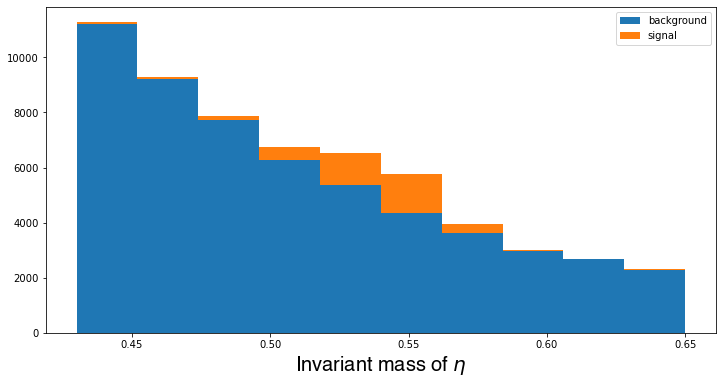

In [12]:
# plotting the invariant mass of eta for both signal and background
# Note: signal is the combination of signal and peaking background

# Invariant mass od eta: sihnal + peaking background of both B0 and B1
eta_sig_InvM = pd.concat(
    [
        df.loc['signal']['pi4_B0_InvM'],df.loc['signal']['pi4_B1_InvM'],
        df.loc['peaking background']['pi4_B0_InvM'],df.loc['peaking background']['pi4_B1_InvM']
    ]
)

# Invariant mass of eta: combinatorial background of both B0 and B1
eta_bkg_InvM = pd.concat([df.loc['combinatorial background']['pi4_B0_InvM'],df.loc['combinatorial background']['pi4_B1_InvM']])


plt.figure(figsize=(12, 6))
bin_value, bin_edge, _ = plt.hist([eta_bkg_InvM,eta_sig_InvM],label=['background','signal'], histtype='barstacked')
plt.xlabel('Invariant mass of $\eta$', fontdict=form_label)
plt.legend()

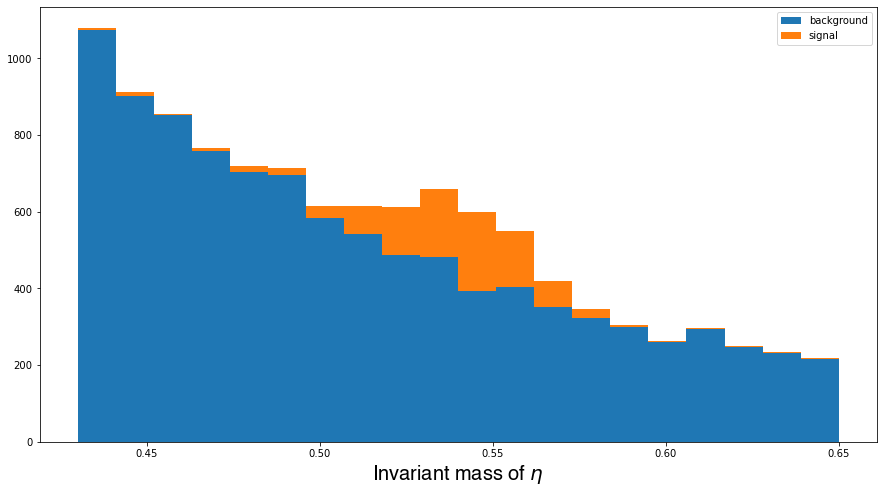

In [13]:
# signal and background of eta

etatrue_Bp_InvM=pd.concat([df_eta_Bp.query(cand0+AND+etatrue0)["pi4_B0_InvM"],
                   df_eta_Bp.query(cand0+AND+etatrue1)["pi4_B1_InvM"]])
etafalse_Bp_InvM=pd.concat([df_eta_Bp.query(cand0+AND+etawide0+AND+NOT+etatrue0)["pi4_B0_InvM"],
                   df_eta_Bp.query(cand0+AND+etawide1+AND+NOT+etatrue1)["pi4_B1_InvM"]])

etatrue_B0_InvM=pd.concat([df_eta_B0.query(cand0+AND+etatrue0)["pi4_B0_InvM"],
                   df_eta_B0.query(cand0+AND+etatrue1)["pi4_B1_InvM"]])
etafalse_B0_InvM=pd.concat([df_eta_B0.query(cand0+AND+etawide0+AND+NOT+etatrue0)["pi4_B0_InvM"],
                   df_eta_B0.query(cand0+AND+etawide1+AND+NOT+etatrue1)["pi4_B1_InvM"]])

etatrue_InvM = pd.Series.to_list(etatrue_Bp_InvM)+pd.Series.to_list(etatrue_B0_InvM)
etafalse_InvM = pd.Series.to_list(etafalse_Bp_InvM)+pd.Series.to_list(etafalse_B0_InvM)

plt.figure(figsize=(15, 8))
plt.hist([etafalse_InvM,etatrue_InvM], histtype='barstacked', label=['background', 'signal'], bins=20)
plt.xlabel('Invariant mass of $\eta$', fontdict=form_label)
plt.legend()


## Fitting

In [ ]:
from lmfit import Model

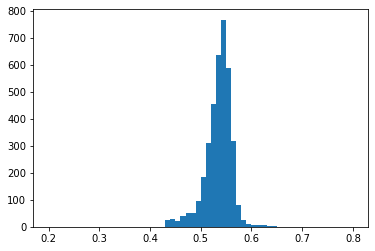

In [40]:
import seaborn as sns

from scipy import stats
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp

x_data = eta_sig_InvM
hist, bin_edges, _ = plt.hist(x_data, histtype='barstacked', bins=np.arange(0.2,0.8,0.01))

hist = hist*0.01/sum(hist)

In [41]:
n = len(hist)
x_hist = np.zeros((n), dtype=float)
for ii in range(n):
    x_hist[ii] = (bin_edges[ii+1]+bin_edges[ii])/2
    
y_hist=hist

In [45]:
#Calculating the Gaussian PDF values given Gaussian parameters and random variable X
def gaus(X,C,X_mean,sigma):
    return C*np.exp(-(X-X_mean)**2/(2*sigma**2))

mean = sum(x_hist*y_hist)/sum(y_hist)                  
sigma = np.sqrt(sum(y_hist*(x_hist-mean)**2)/sum(y_hist))
mean, sigma
# sigma=0.02

(0.5353178023161864, 0.026782909929257578)

In [46]:
#Gaussian least-square fitting process
param_optimised,param_covariance_matrix = curve_fit(gaus,x_hist,y_hist,p0=[max(y_hist),mean,sigma],maxfev=5000)


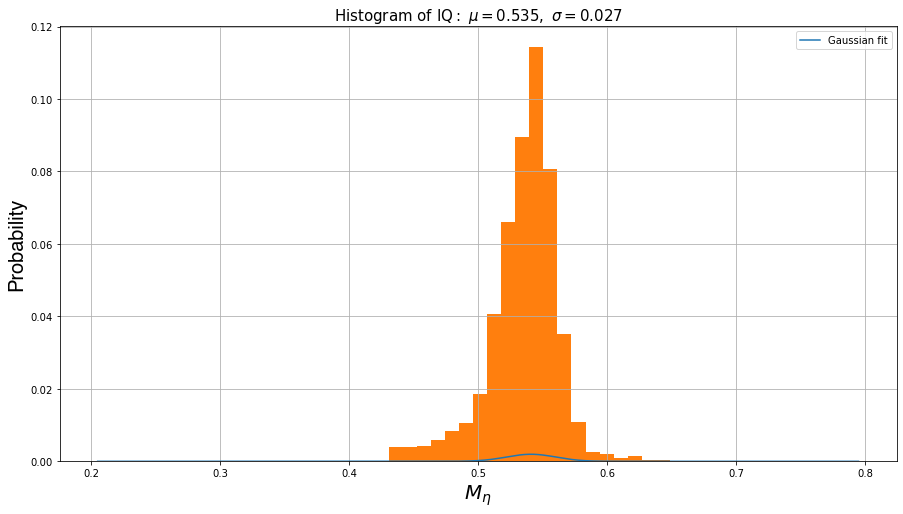

In [47]:
fig = plt.figure(figsize=(15,8))
x_hist_2=np.linspace(np.min(x_hist),np.max(x_hist),500)
plt.plot(x_hist_2,gaus(x_hist_2,*param_optimised),'-',label='Gaussian fit')
plt.legend()

#Normalise the histogram values
weights = np.ones_like(x_data) / len(x_data)
plt.hist(x_data, histtype='barstacked', bins=20, weights=weights)

#setting the label,title and grid of the plot
plt.xlabel('$M_\eta$', fontdict=form_label)
plt.ylabel("Probability", fontdict=form_label)
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=%.3f,\ \sigma=%.3f$' %(mean, sigma), fontdict=form_title)
plt.grid("on")
plt.show()

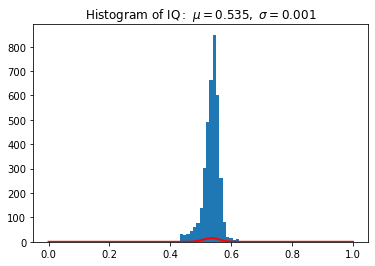

In [27]:
from scipy.stats import norm

mu, std = norm.fit(eta_sig_InvM.dropna())

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
pdf = norm.pdf(x, mu, std)


plt.plot(x, pdf, linewidth=2, color='red')
plt.hist(eta_sig_InvM, histtype='barstacked', bins=20)
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))

plt.show()

Text(0.5, 1.0, '$\\mathrm{Histogram\\ of\\ IQ:}\\ \\mu=0.535,\\ \\sigma=0.001$')

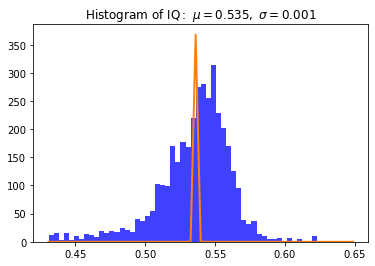

In [28]:
from scipy.stats import norm
import matplotlib.mlab as mlab

(mu, std) = norm.fit(eta_sig_InvM.dropna())
n, bins, patches = plt.hist(eta_sig_InvM.dropna(), 60, facecolor='b', alpha=0.75)

y = norm.pdf(bins, mu, sigma)
l = plt.plot(bins, y, '-', linewidth=2)
plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))